In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi


In [2]:
list_algo_1 = []
list_algo_2 = []

env_type = 'ambulance'
problem_list = ['shifting', 'beta', 'uniform']
param_list = ['0', '1', '0.25']
algo_list = ['metric_Median' , 'metric_Stable']

for problem in problem_list:
    for param in param_list:
        
        name_first = '../data/'+env_type+'_'+str(algo_list[0])+'_'+param+'_'+problem+'/data.csv'
#         name_median = '../data/ambulance'+problem+'_'+param+'_Median'+'/data.csv'
        list_algo_1.append(name_first)
        name_sec = '../data/'+env_type+'_'+str(algo_list[1])+'_'+param+'_'+problem+'/data.csv'
#         name_no = '../data/ambulance_metric'+problem+'_'+param+'_No_Movement'+'/data.csv'
        list_algo_2.append(name_sec)
        
        fig_path = '../figures/'
        fig_name = '../figures/ambulance_'+problem+'_'+param+'.jpg'

       

In [3]:
list_algo_1

['../data/ambulance_metric_Median_0_shifting/data.csv',
 '../data/ambulance_metric_Median_1_shifting/data.csv',
 '../data/ambulance_metric_Median_0.25_shifting/data.csv',
 '../data/ambulance_metric_Median_0_beta/data.csv',
 '../data/ambulance_metric_Median_1_beta/data.csv',
 '../data/ambulance_metric_Median_0.25_beta/data.csv',
 '../data/ambulance_metric_Median_0_uniform/data.csv',
 '../data/ambulance_metric_Median_1_uniform/data.csv',
 '../data/ambulance_metric_Median_0.25_uniform/data.csv']

<ipython-input-4-4213fdefc358>:29: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


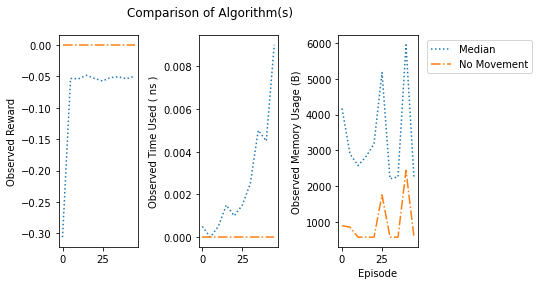

In [4]:
dt_first = pd.read_csv(list_algo_1[0]).groupby(['episode']).mean()
dt_second = pd.read_csv(list_algo_2[0]).groupby(['episode']).mean()
dt_first['episode'] = dt_first.index.values
dt_second['episode'] = dt_second.index.values

#Select fewer points to plot default = 10
dt_second = dt_second.iloc[::5, :]
dt_first = dt_first.iloc[::5, :]
       
fig, ax = plt.subplots(1, 3, constrained_layout=True)
fig.figsize = [30,30]
fig.suptitle('Comparison of Algorithm(s) ')

ax[0].plot(dt_first['episode'], dt_first['epReward'], label='Median', linestyle=':')
ax[0].plot(dt_second['episode'], dt_second['epReward'], label = 'No Movement', linestyle='-.')
ax[0].set_ylabel('Observed Reward')

ax[1].plot(dt_first['episode'], dt_first['time'], label='Median', linestyle=':')
ax[1].plot(dt_second['episode'], dt_second['time'], label = 'No Movement', linestyle='-.')
ax[1].set_ylabel('Observed Time Used ( ns )')


ax[2].plot(dt_first['episode'], dt_first['memory'], label='Median', linestyle=':')
ax[2].plot(dt_second['episode'], dt_second['memory'], label = 'No Movement', linestyle='-.')
ax[2].set_ylabel('Observed Memory Usage (B)')

# plt.ylim(0,5+.1)
plt.xlabel('Episode')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

### Radar plot testing ( not working due to scaling issues )

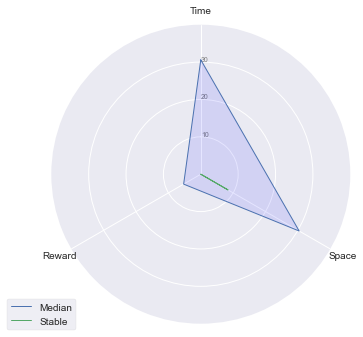

In [16]:
# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

nEps = 50
numIters = 20
epLen = 5

#Organizing Data

#Reward
reward = pd.read_csv(list_algo_1[0])
r2 = pd.read_csv(list_algo_2[0])
reward = reward.loc[reward['episode'] == (nEps-1)]
reward = reward['epReward'].mean()
r2 = r2.loc[r2['episode'] == (nEps-1)]
r2 = r2['epReward'].mean()
reward = np.array([reward,r2])

#Time
time = pd.read_csv(list_algo_1[0]).groupby('iteration').mean()
t1 = pd.read_csv(list_algo_2[0]).groupby('iteration').mean()
time = time['time'].mean()
t1 = t1['time'].mean()
time = np.array([time , t1])

#Space
space = pd.read_csv(list_algo_1[0]).groupby('iteration').mean()
s1 = pd.read_csv(list_algo_2[0]).groupby('iteration').mean()
space = space['memory'].mean()
s1 = s1['memory'].mean()
space = np.array([space , s1])    
    
    

    
# Set data
df = pd.DataFrame({'group': ['Median', 'Stable'],
                    'Time': time*10000,
                   'Space': space/100,
                  'Reward': np.abs(reward*100)})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.style.use('seaborn')
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Median")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Stable")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), frameon = True)

# Show the graph

plt.show()

In [20]:
df = pd.DataFrame({'group': ['Median', 'Stable'],
                    'Time': time,
                   'Space': space,
                  'Reward': np.abs(reward)})
df

,group,Time,Space,Reward
0,Median,0.00306,3039.283,0.053
1,Stable,0.00000,838.123,0.000


No handles with labels found to put in legend.
No handles with labels found to put in legend.


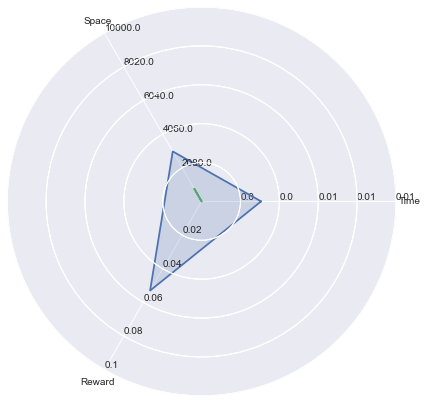

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # improves plot aesthetics


def _invert(x, limits):
    """inverts a value x on a scale from
    limits[0] to limits[1]"""
    return limits[1] - (x - limits[0])

def _scale_data(data, ranges):
    """scales data[1:] to ranges[0],
    inverts if the scale is reversed"""
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        assert (y1 <= d <= y2) or (y2 <= d <= y1)
    x1, x2 = ranges[0]
    d = data[0]
    if x1 > x2:
        d = _invert(d, (x1, x2))
        x1, x2 = x2, x1
    sdata = [d]
    for d, (y1, y2) in zip(data[1:], ranges[1:]):
        if y1 > y2:
            d = _invert(d, (y1, y2))
            y1, y2 = y2, y1
        sdata.append((d-y1) / (y2-y1) 
                     * (x2 - x1) + x1)
    return sdata

class ComplexRadar():
    def __init__(self, fig, variables, ranges,
                 n_ordinate_levels=6):
        angles = np.arange(0, 360, 360./len(variables))

        axes = [fig.add_axes([0.1,0.1,0.9,0.9],polar=True,
                label = "axes{}".format(i)) 
                for i in range(len(variables))]
        l, text = axes[0].set_thetagrids(angles, 
                                         labels=variables)
        [txt.set_rotation(angle-90) for txt, angle 
             in zip(text, angles)]
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], 
                               num=n_ordinate_levels)
            gridlabel = ["{}".format(round(x,2)) 
                         for x in grid]
            if ranges[i][0] > ranges[i][1]:
                grid = grid[::-1] # hack to invert grid
                          # gridlabels aren't reversed
            gridlabel[0] = "" # clean up origin
            ax.set_rgrids(grid, labels=gridlabel,
                         angle=angles[i])
            #ax.spines["polar"].set_visible(False)
            ax.set_ylim(*ranges[i])
        # variables for plotting
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)
    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

# example data
variables = ("Time","Space","Reward")
data = (df['Time'][0], df['Space'][0], df['Reward'][0] ) 
data2 = (df['Time'][1], df['Space'][1], df['Reward'][1] ) 
ranges = [(0.00, 0.01), (100,10000), (0.0, 0.1)]            

# plotting
fig1 = plt.figure(figsize=(6, 6))
radar = ComplexRadar(fig1, variables, ranges)
radar.plot(data)
radar.plot(data2)
radar.fill(data, alpha=0.2)
radar.fill(data2, alpha=0.2)
radar.ax.legend()
plt.show()  

In [36]:
import plotly.graph_objects as go
import plotly.offline as pyo


categories = ['Time','Space','Rewards']
categories = [*categories]

d1 = df.iloc[0]
d2 = df.iloc[1]

d1 = [*d1, d1[0]]
d2 = [*d2, d2[0]]

fig = go.Figure(
    data=[go.Scatterpolar(r=d1, theta=categories, name='Restaurant 1'),
        go.Scatterpolar(r=d2, theta=categories, name='Restaurant 2')],
    layout=go.Layout(
        title=go.layout.Title(text='comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

pyo.plot(fig)

'temp-plot.html'